<a href="https://colab.research.google.com/github/MamadouBousso/IAProjects/blob/master/Personclassificationfastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
pip install fastai --upgrade

     |████████████████████████████████| 358kB 3.4MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [1]:
#export
"""
# Colab Fast AI Utils
The following script will be exported for being used as setup script all of the
other notebooks for running on Google Colab
"""
import os
REQUIREMENTS_PIP = """pip install azure-cognitiveservices-search-imagesearch
pip install git+https://github.com/fastai/fastai2 
pip install git+https://github.com/fastai/fastcore
pip install nbdev"""

SETUP_WARNING="""    NOTE: For debugging and visualizing stdout, please run:
    from colab_utils import *
    !{REQUIREMENTS_PIP}
    !{GIT_CLONE_REPOSITORY}
    %cd {FASTAI_NB_PATH}
"""

GIT_CLONE_REPOSITORY = 'git clone https://github.com/fastai/course-v4/'

FASTAI_NB_PATH = "course-v4/nbs/"
def install_requirements():
    print("Installing requirements...")
    os.system(REQUIREMENTS_PIP)
    print("Done!")

def clone_repository():
    print("Cloning FastAI Repository...")
    os.system(GIT_CLONE_REPOSITORY)
    print("Done!")

def open_nb_folder():
    print(f"Opening folder {FASTAI_NB_PATH} with nbs and utils files...")
    os.chdir(FASTAI_NB_PATH)
    print("Done!")

def setup_fastai_colab():
    print(SETUP_WARNING)
    install_requirements()
    clone_repository()
    open_nb_folder()

In [2]:
#from colab_utils import setup_fastai_colab
setup_fastai_colab()

    NOTE: For debugging and visualizing stdout, please run:
    from colab_utils import *
    !{REQUIREMENTS_PIP}
    !{GIT_CLONE_REPOSITORY}
    %cd {FASTAI_NB_PATH}

Installing requirements...
Done!
Cloning FastAI Repository...
Done!
Opening folder course-v4/nbs/ with nbs and utils files...
Done!


In [4]:
#hide
from utils import *
from fastai2.vision.widgets import *

In [5]:
key = "52b19ae6320942569df05defe8b2edc5"

In [6]:
results = search_images_bing(key, 'men women')
ims = results.attrgot('content_url')
len(ims)



150

In [7]:
dest = 'images/man.jpg'
download_url(ims[0], dest)

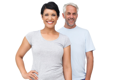

In [8]:
im = Image.open(dest)
im.to_thumb(128,128)

In [9]:
persons_types = 'man','woman'
path = Path('persons')

In [10]:
if not path.exists():
    path.mkdir()
    for o in persons_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} person')
        download_images(dest, urls=results.attrgot('content_url'))

In [11]:
fns = get_image_files(path)
fns

(#154) [Path('persons/man/00000129.jpg'),Path('persons/man/00000101.jpg'),Path('persons/man/00000142.jpg'),Path('persons/man/00000023.jpg'),Path('persons/man/00000088.jpg'),Path('persons/man/00000072.jpg'),Path('persons/man/00000094.jpg'),Path('persons/man/00000110.jpg'),Path('persons/man/00000015.jpg'),Path('persons/man/00000018.jpg')...]

In [12]:
failed = verify_images(fns)
failed

(#0) []

In [13]:
persons = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.3, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [16]:
dls = persons.dataloaders(path)

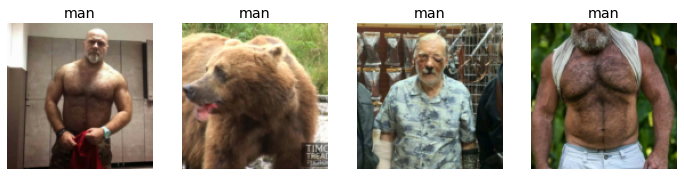

In [20]:
dls.valid.show_batch(max_n=4, nrows=1)

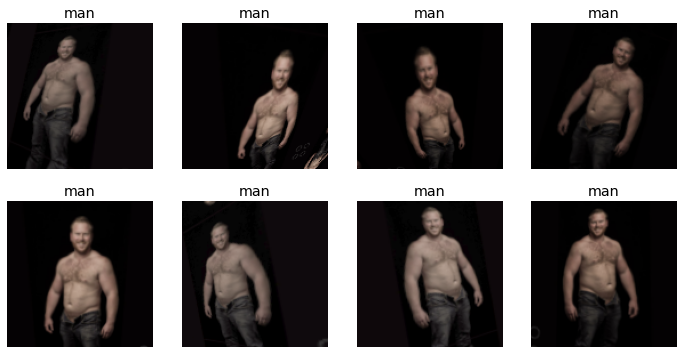

In [19]:
persons = persons.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = persons.dataloaders(path)
dls.train.get_idxs = lambda: Inf.ones
dls.train.show_batch(max_n=8, nrows=2)

In [21]:
persons = persons.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = persons.dataloaders(path)

In [22]:
len(persons.get_items(path))

144

In [1]:
learn = cnn_learner(dls, resnet152, metrics=error_rate)
learn.fine_tune(2)

NameError: ignored

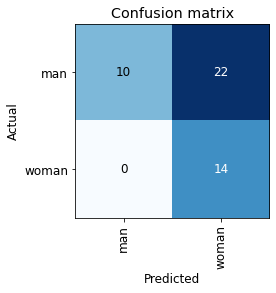

In [139]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

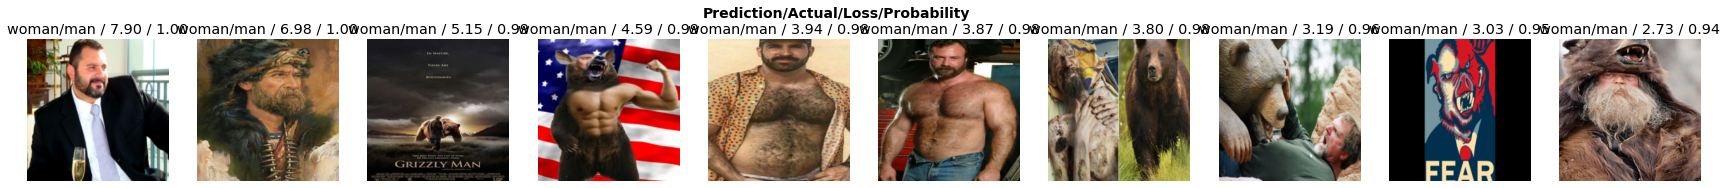

In [140]:
interp.plot_top_losses(10, nrows=1)

In [123]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [124]:
#hide
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)



In [125]:
dls = persons.dataloaders(path)

In [126]:
learn = cnn_learner(dls, resnet50, metrics=error_rate)
learn.fine_tune(4)

In [1]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

NameError: ignored